factor analysis begin:  Factor_MeanReversion
analysis factor/portfolio:  True/True
long-short/group neutral:  True/False
strategy:  eq_weight optimize:  max_sharpe
simulation_time:                 0
start 2014-01-01
end   2016-01-01
[ 19:21:42.761222]: INFO: 2014-01-06 21:00:00+00:00 | Longs: 25 | Shorts: 25 | 10,000,000.00
[ 19:21:44.500986]: INFO: 2014-01-13 21:00:00+00:00 | Longs: 25 | Shorts: 25 | 9,955,877.18
[ 19:21:45.438594]: INFO: 2014-01-21 21:00:00+00:00 | Longs: 25 | Shorts: 25 | 9,870,232.14
[ 19:21:46.235462]: INFO: 2014-01-27 21:00:00+00:00 | Longs: 25 | Shorts: 25 | 10,027,923.50
[ 19:21:47.343408]: INFO: 2014-02-03 21:00:00+00:00 | Longs: 25 | Shorts: 25 | 9,959,362.20
[ 19:21:48.385762]: INFO: 2014-02-10 21:00:00+00:00 | Longs: 25 | Shorts: 25 | 10,002,031.99
[ 19:21:49.492644]: INFO: 2014-02-18 21:00:00+00:00 | Longs: 25 | Shorts: 25 | 10,026,214.45
[ 19:21:50.418987]: INFO: 2014-02-24 21:00:00+00:00 | Longs: 25 | Shorts: 25 | 9,672,190.45
[ 19:21:51.555993]: INFO: 2

KeyboardInterrupt: 

saved:  Factor_MeanReversion


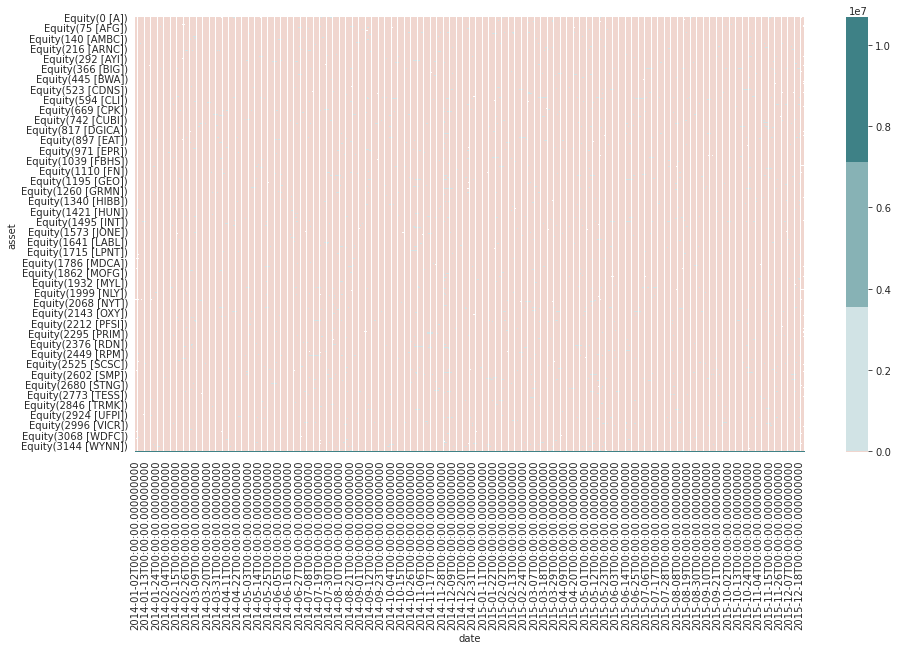

In [5]:
from IPython.display import Javascript, clear_output
from nbconvert import HTMLExporter
import time
import os

def save_notebook(name):
    display(
        Javascript("IPython.notebook.save_notebook()"),
        include=['application/javascript']
    )
    print("saved: ", name)

def output_HTML(read_file, output_file):
    import codecs
    import nbformat
    exporter = HTMLExporter()
    # read_file is '.ipynb', output_file is '.html'
    output_notebook = nbformat.read(read_file, as_version=4)
    output, resources = exporter.from_notebook_node(output_notebook)
    try:
        os.remove(output_file)
    except OSError as e:
        pass
    file = codecs.open(output_file, 'w', encoding='utf-8')
    file.write(output)
    file.close()

import factors
import inspect
n, N = 0, 3 # number of max factors in regression
for name, obj in inspect.getmembers(factors, predicate=inspect.isclass):
    if obj.__module__ == "factors" and n<N:
        clear_output(wait=True)
        time.sleep(1)
        %run -i backtest.py {name} 
        time.sleep(3)
        save_notebook(name)
        time.sleep(1)
        current_file = 'regression.ipynb'
        output_file = f'results/factor_{name}.html'
        output_HTML(current_file, output_file)
        n = n+1